In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('E.csv')

In [3]:
data['Format'] = data['Format'].replace(['Paperback', 'Mass Market Paperback', 'paperback', 'Comic Book', 'soft cover', 'Softcover', 'Paperback & e-book'], 0)
data['Format'] = data['Format'].replace(['Hardcover', 'hardcover', 'Board Book', 'Library Binding', 'Board book', 'Leather Bound', 'Boxed Set', 'Board book', 'School & Library Binding', 'Spiral-bound'], 1)
data['Format'] = data['Format'].replace(['Kindle', 'Kindle Edition', 'ebook', 'Nook', 'Audible Audio', 'Audio Cassette', 'Audio CD', 'MP3 CD', 'Audio', 
                                        'Audiobook'], 2)
data['Format'] = data['Format'].replace(['Issue','Unknown Binding', 'Mass Market', 'Other Format', 'Misc. Supplies'], 3)

In [4]:
data['Format'].unique()

array([ 0.,  1.,  2., nan,  3.])

In [4]:
data['Publishing_Date'].fillna(0, inplace=True)
data['Publishing_Year'] = data.apply((lambda row: 0 if row['Publishing_Date'] == 0 
                                      else int(row['Publishing_Date'].split('-')[0])), axis=1)

In [6]:
correlation = data.corr()

In [7]:
correlation

,Format,Pages,Rating,Publishing_Year
Format,1.000000,0.061224,0.040285,-0.149441
Pages,0.061224,1.000000,0.189690,0.060327
Rating,0.040285,0.189690,1.000000,0.165962
Publishing_Year,-0.149441,0.060327,0.165962,1.000000


In [8]:
len(data['Publisher'].unique())

1760

In [9]:
len(data['Author'].unique())

3534

In [10]:
len(data['Name'].unique())

6266

In [5]:
!pip3 install gender-guesser

You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [6]:
import re
import gender_guesser.detector as gender
def extractGivenName(full_name):
   clean_name_split = re.sub('[\.\-]',' ', str(full_name)).split()
   for s in clean_name_split[:-1]:
       if(len(s) > 1):
           return s
   return clean_name_split[0]
   
def getGender(full_name):
   d = gender.Detector(case_sensitive=False)
   g = d.get_gender(extractGivenName(full_name))
   if g == 'mostly_male' or g == 'male':
    print ('male')
    return 1
   elif g == 'mostly_female' or g == 'female':
    print ('female')
    return 0
   else:
    print ('unknown')
    return 2
   


In [ ]:
data['Gender'] = data.apply(lambda row: getG
                            ender(row['Author']), axis=1)

In [8]:
data.corr()

,Format,Pages,Rating,Publishing_Year,Gender
Format,1.000000,0.061224,0.040285,-0.149441,-0.023373
Pages,0.061224,1.000000,0.189690,0.060327,0.036811
Rating,0.040285,0.189690,1.000000,0.165962,0.036531
Publishing_Year,-0.149441,0.060327,0.165962,1.000000,0.001555
Gender,-0.023373,0.036811,0.036531,0.001555,1.000000


In [9]:
data.groupby(['Gender'])['Pages'].mean()

Gender
0    304.744832
1    356.203082
2    320.977620
Name: Pages, dtype: float64

In [143]:
data.groupby(['Gender']).size()

Gender
0    1816
1    3427
2    1066
dtype: int64

In [13]:
data.groupby(['Gender'])['Rating'].mean()

Gender
0    4.107326
1    4.111010
2    4.169960
Name: Rating, dtype: float64

[437, 268, 341, 2]


/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


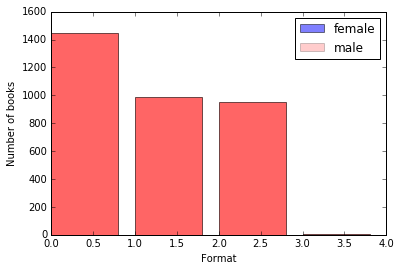

In [189]:
df = data.groupby(['Gender', 'Format']).size().reset_index(name='count')
print(list(df[df['Gender'] == 2]['count']))
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax1 = ax.bar([0,1,2,3], list(df[df['Gender'] == 0]['count']), color='blue', alpha=0.5)
ax2 = ax.bar([0,1,2,3], list(df[df['Gender'] == 1]['count']), color='red', alpha=0.5)
ax.legend((ax1, ax2), ('female', 'male') )
plt.legend(loc='upper left')
plt.xlabel('Format')
plt.ylabel('Number of books')
plt.show()

In [ ]:
plt.hist(data['Gender'], data['Format'].unique)

In [16]:
df.head()

0     2017
1     2017
2     2012
3     2012
4     1993
5     2018
9     2018
11    2016
15    2017
16    2018
21    2017
22    2005
26    1999
31    2014
58    2013
Name: Publishing_Year, dtype: int64

In [38]:
new_df = data[(data['Gender'] == 0) | (data['Gender'] == 1)]

In [39]:
new_df.corr()

,Format,Pages,Rating,Publishing_Year,Gender
Format,1.000000,0.057843,0.065175,-0.154628,-0.051740
Pages,0.057843,1.000000,0.189347,0.063086,0.094549
Rating,0.065175,0.189347,1.000000,0.152083,0.003679
Publishing_Year,-0.154628,0.063086,0.152083,1.000000,0.044873
Gender,-0.051740,0.094549,0.003679,0.044873,1.000000


In [192]:
data_nod = data[data['Publishing_Year'] != 0]
g0 = data_nod[data_nod['Gender']==0].groupby(['Publishing_Year']).size()
g1 = data_nod[data_nod['Gender']==1].groupby(['Publishing_Year']).size()
g2 = data_nod[data_nod['Gender']==2].groupby(['Publishing_Year']).size()

/usr/local/lib/python3.6/site-packages/matplotlib/legend.py:633: UserWarning: Legend does not support <matplotlib.axes._subplots.AxesSubplot object at 0x1191ef940> instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
/usr/local/lib/python3.6/site-packages/matplotlib/legend.py:633: UserWarning: Legend does not support <matplotlib.axes._subplots.AxesSubplot object at 0x1198f1358> instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)


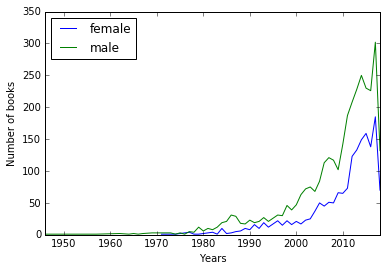

In [193]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax1 = g0.plot(x=['Publishing_Year'], y=['Count'], label='female')
ax2 = g1.plot(x=['Publishing_Year'], y=['Count'], label='male')
#ax3 = g2.plot(x=['Publishing_Year'], y=['Count'], label='unknown')
ax.legend((ax1, ax2, ax3), ('female', 'male', 'unknown') )
plt.legend(loc='upper left')
plt.xlabel('Years')
plt.ylabel('Number of books')
plt.show()

/usr/local/lib/python3.6/site-packages/matplotlib/legend.py:633: UserWarning: Legend does not support <matplotlib.axes._subplots.AxesSubplot object at 0x1198854a8> instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)


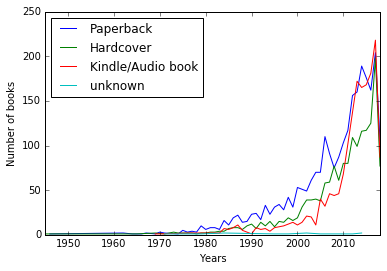

In [196]:
data_nod = data[data['Publishing_Year'] != 0]
g0 = data_nod[data_nod['Format']==0].groupby(['Publishing_Year']).size()
g1 = data_nod[data_nod['Format']==1].groupby(['Publishing_Year']).size()
g2 = data_nod[data_nod['Format']==2].groupby(['Publishing_Year']).size()
g3 = data_nod[data_nod['Format']==3].groupby(['Publishing_Year']).size()
fig = plt.figure()
ax = fig.add_subplot(111)
ax1 = g0.plot(x=['Publishing_Year'], y=['Count'], label='Paperback')
ax2 = g1.plot(x=['Publishing_Year'], y=['Count'], label='Hardcover')
ax3 = g2.plot(x=['Publishing_Year'], y=['Count'], label='Kindle/Audio book')
ax4 = g3.plot(x=['Publishing_Year'], y=['Count'], label='unknown')
ax.legend((ax1, ax2, ax3, ax4), ('Hardcover', 'Paperback', 'Kindle/audio book', 'unknown') )
plt.legend(loc='upper left')
plt.xlabel('Years')
plt.ylabel('Number of books')
plt.show()

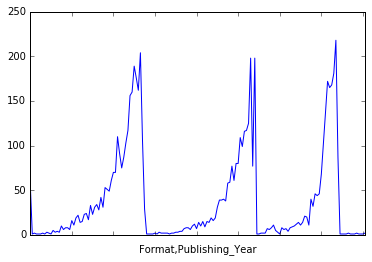

In [53]:
import matplotlib.pyplot as plt
g.plot(x=['Publishing_Year'], y=['Count'])
plt.show()